In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
os.chdir('D:/Dataset/bank_additional')

In [32]:
bank = pd.read_csv('train.csv')

In [33]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix=['y'], drop_first=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
# take a look at the type, number of columns, entries, null values etc.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [38]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1) Bank client data Analysis and Categorical Treatment

In [39]:
bank_client = bank.iloc[:,0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


1.1) 1.1. Knowing the categorical variables

In [40]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [41]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [42]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [43]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n',bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


1.2. Age

In [44]:
print('Minimum Age:', bank_client['age'].min())
print('Maximum Age:', bank_client['age'].max())
print('Null Value:', bank_client['age'].isnull().any())

Minimum Age: 17
Maximum Age: 98
Null Value: False


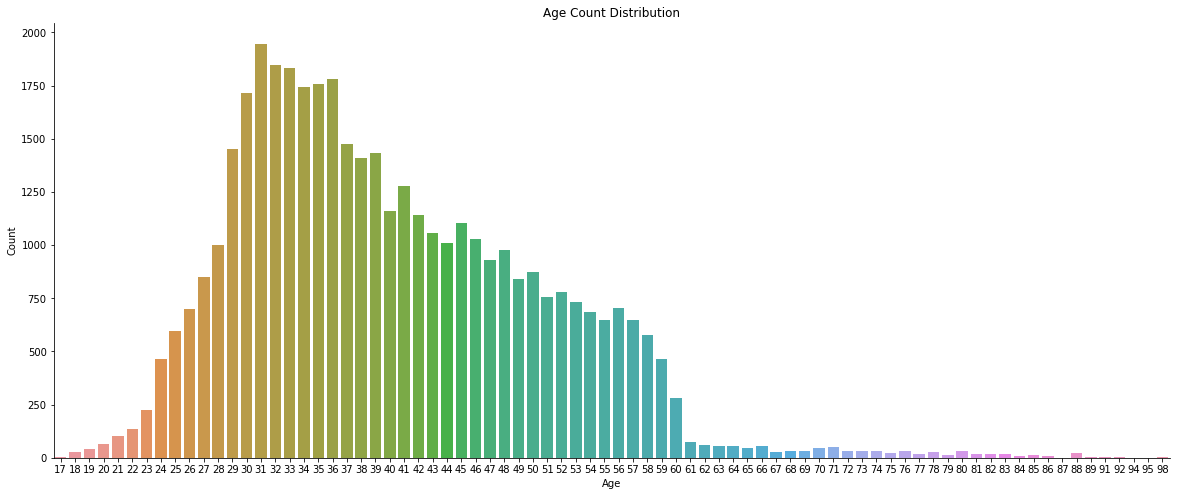

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Count Distribution')
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age X Occurance')

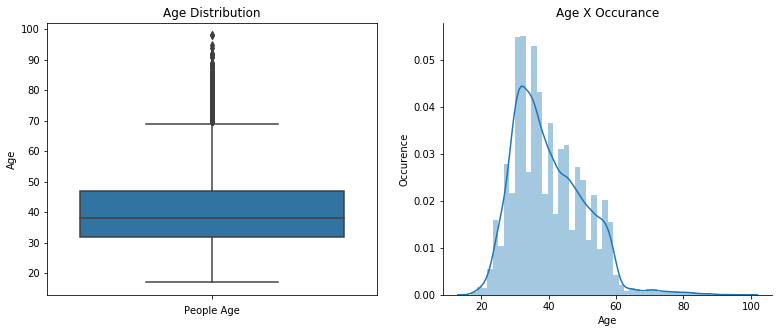

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,5))
sns.boxplot(x = 'age', data = bank_client, orient='v', ax = ax1)
ax1.set_xlabel('People Age')
ax1.set_ylabel('Age')
ax1.set_title('Age Distribution')

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Occurence')
ax2.set_title('Age X Occurance')

In [48]:
# Quartiles
print('1 Quartile', bank_client['age'].quantile(q = 0.25))
print('2 Quartile', bank_client['age'].quantile(q = 0.50))
print('3 Quartile', bank_client['age'].quantile(q = 0.75))
print('4 Quartile', bank_client['age'].quantile(q = 1.00))

print('Ages Above:', bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) -
                                                                 bank_client['age'].quantile(q = 0.25)), 'are outliers')

1 Quartile 32.0
2 Quartile 38.0
3 Quartile 47.0
4 Quartile 98.0
Ages Above: 69.5 are outliers


In [49]:
print('Number of Outlieres:', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients:', len(bank_client))
print('Outliers are:', round(bank_client[bank_client['age']> 69.6]['age'].count()*100/len(bank_client),2),'%')

Number of Outlieres: 469
Number of clients: 41188
Outliers are: 1.14 %


In [51]:
print('Mean:', round(bank_client['age'].mean(),1))
print('Standarad Deviation:', round(bank_client['age'].std(),1))
# cofficient variation = (STD/Mean)*100
# cv < 15% low dispersion
# cv > 15% high dispersion
print('Cofficient Variation:', round(bank_client['age'].std()*100/bank_client['age'].mean(),1),', High Middle dispersion')

Mean: 40.0
Standarad Deviation: 10.4
Cofficient Variation: 26.0 , High Middle dispersion


1.3. JOBS

Text(0.5,1,'Job Count Distribution')

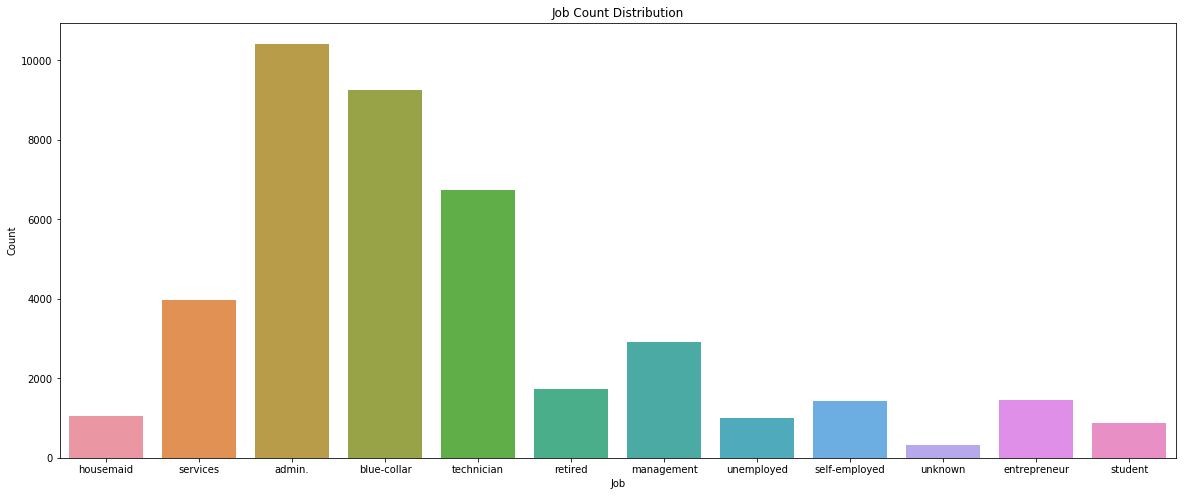

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_title('Job Count Distribution')

1.4. MARITAL

Text(0.5,1,'Marital Count Distribution')

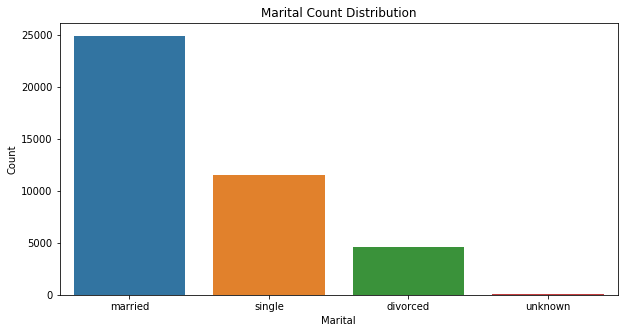

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital')
ax.set_ylabel('Count')
ax.set_title('Marital Count Distribution')

1.5. EDUCATION

Text(0.5,1,'Education Count Distribution')

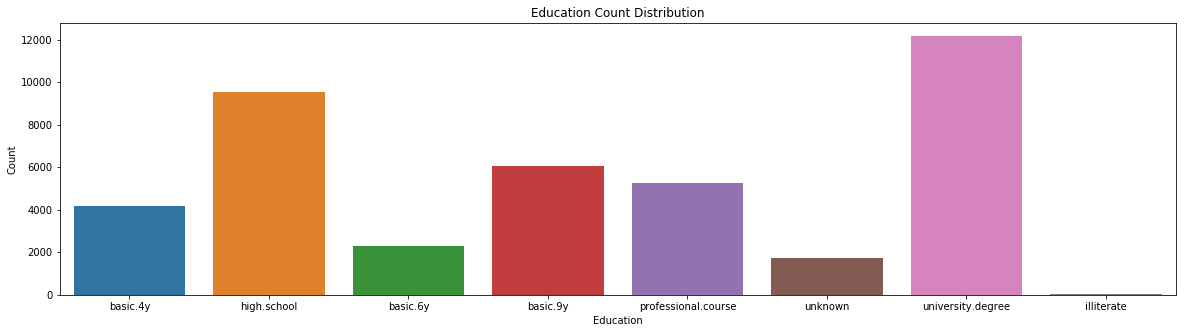

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Education Count Distribution')

1.6. DEFAULT, HOUSING, LOAN

Text(0,0.5,'Count')

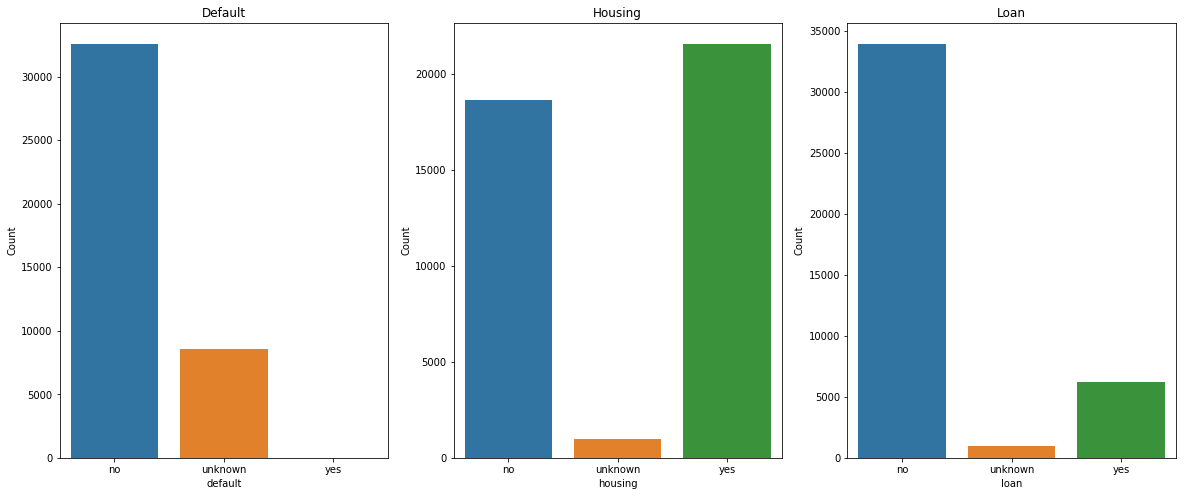

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default')
ax1.set_ylabel('Count')

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing')
ax2.set_ylabel('Count')

sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan')
ax3.set_ylabel('Count')

In [61]:
print('Default:\nNO Credit in default:', bank_client[bank_client['default'] == 'no']['age'].count(), 
     '\nUnknown Credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
     '\nYes Credit in default:', bank_client[bank_client['default'] == 'yes']['age'].count())

Default:
NO Credit in default: 32588 
Unknown Credit in default: 8597 
Yes Credit in default: 3


In [62]:
print('Housing:\nNo Housing in loan:', bank_client[bank_client['housing'] == 'no']['age'].count(),
     '\nUnknown Housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
     '\nYes Housing in loan:', bank_client[bank_client['housing'] == 'yes']['age'].count())

Housing:
No Housing in loan: 18622 
Unknown Housing in loan: 990 
Yes Housing in loan: 21576


In [63]:
print('Housing:\nNo Personal loan:', bank_client[bank_client['loan'] == 'no']['age'].count(),
     '\nUnknown Personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
     '\nYes Personal loan:', bank_client[bank_client['loan'] == 'yes']['age'].count())

Housing:
No Personal loan: 33950 
Unknown Personal loan: 990 
Yes Personal loan: 6248


BANK CLIENTS CONCLUSION
The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

1.7. Bank Client Categorical Treatment

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
labelencoder_X = LabelEncoder()

In [66]:
# Label encoder order is alphabetical
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])

In [71]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe

age(bank_client);

In [72]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,1,3,1,0,0,0,0
1,1,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,1,0,1,1,0,0,0
4,1,7,1,3,0,0,2


In [73]:
print(bank_client.shape)

(41188, 7)


# 2) Related with the last contact of the current campaign

*) Treat categorical, see those values
*) group continuous variables if necessary

In [75]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[:,7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [77]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [78]:
print('Kind of Contact:\n', bank_related['contact'].unique())
print('\nWhich month this campaign work\n', bank_related['month'].unique())
print('\nWhich day of week this campaign work\n', bank_related['day_of_week'].unique())

Kind of Contact:
 ['telephone' 'cellular']

Which month this campaign work
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which day of week this campaign work
 ['mon' 'tue' 'wed' 'thu' 'fri']


2.1 Duration

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Duration x Occurance')

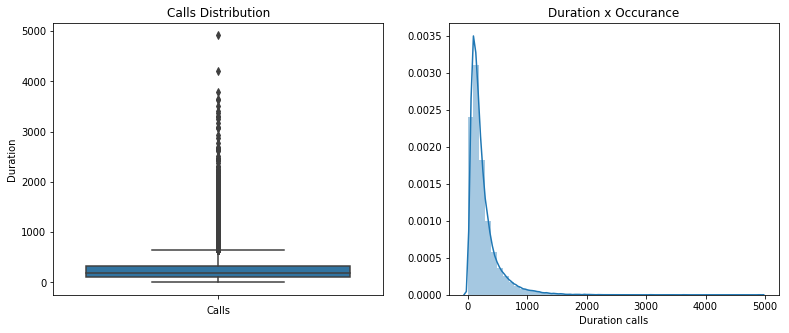

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,5))
sns.boxplot(x = 'duration', data = bank_related, orient='v', ax = ax1)
ax1.set_xlabel('Calls')
ax1.set_ylabel('Duration')
ax1.set_title('Calls Distribution')

sns.distplot(bank_related['duration'], ax = ax2)
ax2.set_xlabel('Duration calls')
ax2.set_title('Duration x Occurance')

In [80]:
print('Max Duration call in minutes:', round((bank_related['duration'].max()/60),1))
print('Min Duration call in minutes:', round((bank_related['duration'].min()/60),1))
print('Mean Duration call in minutes:', round((bank_related['duration'].mean()/60),1))
print('STD Duration call in minutes:', round((bank_related['duration'].std()/60),1))

Max Duration call in minutes: 82.0
Min Duration call in minutes: 0.0
Mean Duration call in minutes: 4.3
STD Duration call in minutes: 4.3


In [177]:
# Quartiles
print('1 Quartile:', bank_related['duration'].quantile(q = 0.25))
print('2 Quartile:', bank_related['duration'].quantile(q = 0.50))
print('2 Quartile:', bank_related['duration'].quantile(q = 0.75))
print('4 Quartile:', bank_related['duration'].quantile(q = 1.00))

print('Duration above:', bank_related['duration'].quantile(q = 0.75) + 1.5*(bank_related['duration'].quantile(q = 0.75) -
                                                                          bank_related['duration'].quantile(q = 0.25)),'are outliers')

1 Quartile: 1.0
2 Quartile: 2.0
2 Quartile: 3.0
4 Quartile: 5.0
Duration above: 6.0 are outliers


In [85]:
print('Number of outliers:', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients:', len(bank_related))
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2),'%')

Number of outliers: 2963
Number of clients: 41188
Outliers are: 7.19 %


In [86]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
bank_related[bank_related['duration'] == 0]

,contact,month,day_of_week,duration
6251,telephone,may,tue,0
23031,cellular,aug,tue,0
28063,cellular,apr,fri,0
33015,cellular,may,mon,0


2.2 Contact, Month, Day of Week

Text(0.5,1,'Day of week Count')

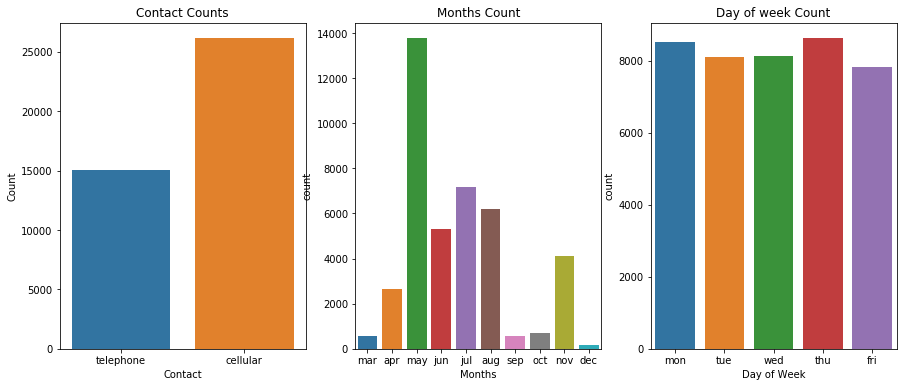

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact')
ax1.set_ylabel('Count')
ax1.set_title('Contact Counts')

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months')
ax2.set_title('Months Count')

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week')
ax3.set_title('Day of week Count')

In [89]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

2.1 Contact, Month, Day of Week treatment

In [90]:
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [91]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [92]:
def duration(df):
    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180), 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319), 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration'] > 644.5, 'duration'] = 5
    return df
duration(bank_related);

In [93]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


Social and economic context attributes

In [94]:
bank_se = bank.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


Other attributes

In [96]:
bank_o = bank.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [97]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [108]:
bank_o['poutcome'].replace(['nonexistent','failure','success'], [1,2,3], inplace = True)

In [109]:
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)

In [110]:
bank_final = bank_final[['age','job','marital','education','default','housing','loan','contact','month','day_of_week',
                        'duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed', 'campaign',
                        'pdays','previous','poutcome']]
bank_final.shape

(41188, 20)

# Modeling

In [101]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [114]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,1,5,1,6,0,2,0,0,7,4,5,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,1,7,1,5,1,0,0,1,4,0,2,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,0,3,1,5,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,1,6,1,6,0,2,0,0,7,3,1,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,1,5,0,0,0,2,2,0,6,3,3,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [126]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

In [124]:
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6907  166]
 [ 601  326]]
90.0


# K-Nearest Neighbour

In [127]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

In [128]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

k=1 87.95 (+/- 0.61)
k=2 89.76 (+/- 0.44)
k=3 89.76 (+/- 0.39)
k=4 90.18 (+/- 0.48)
k=5 90.14 (+/- 0.45)
k=6 90.28 (+/- 0.50)
k=7 90.34 (+/- 0.43)
k=8 90.33 (+/- 0.49)
k=9 90.38 (+/- 0.43)
k=10 90.31 (+/- 0.57)
k=11 90.30 (+/- 0.51)
k=12 90.30 (+/- 0.60)
k=13 90.39 (+/- 0.52)
k=14 90.40 (+/- 0.53)
k=15 90.40 (+/- 0.49)
k=16 90.38 (+/- 0.52)
k=17 90.42 (+/- 0.51)
k=18 90.39 (+/- 0.51)
k=19 90.36 (+/- 0.52)
k=20 90.36 (+/- 0.47)
k=21 90.42 (+/- 0.42)
k=22 90.42 (+/- 0.45)
k=23 90.43 (+/- 0.46)
k=24 90.39 (+/- 0.44)
k=25 90.39 (+/- 0.43)
The optimal number of neighbors is 22 with 90.4%


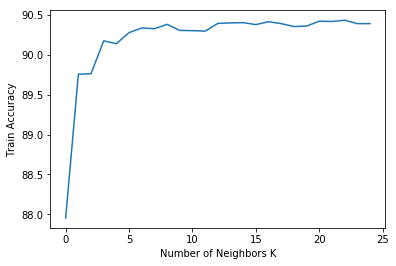

In [131]:
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

In [138]:
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6964  109]
 [ 679  248]]
90.0


# Support Vector Machine

In [135]:
from sklearn.svm import SVC

In [139]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)

In [140]:
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv = k_fold, scoring = 'accuracy', n_jobs=1).mean())

[[6536  537]
 [ 578  349]]
86.0


# Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

In [143]:
print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv = k_fold, scoring = 'accuracy', n_jobs=1).mean())

[[6618  455]
 [ 474  453]]
88.0


# Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

In [146]:
print(confusion_matrix(y_test, rfcpred))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv = k_fold, scoring = 'accuracy', n_jobs=1).mean())

[[6789  284]
 [ 483  444]]
90.0


# Gaussian NB

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

In [149]:
print(confusion_matrix(y_test, gaussiannbpred))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6277  796]
 [ 419  508]]
85.0


In [150]:
from xgboost import XGBClassifier

In [151]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)

In [152]:
print(confusion_matrix(y_test, xgbpred))
print(round(accuracy_score(y_test, xgbpred),2)*100)
XGB = (cross_val_score(xgb, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6859  214]
 [ 501  426]]
91.0


# Gradient Boost

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

In [155]:
print(confusion_matrix(y_test, gbkpred))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv = k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6820  253]
 [ 451  476]]
91.0


In [156]:
models = pd.DataFrame({
    'models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine', 'K-Nearest Neighbours',
              'Logistic Regression', 'Gaussian NB', 'XGBoost', 'Gradient Boosting'],
    'score': [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]
})

models.sort_values(by = 'score', ascending = False)

,models,score
7,Gradient Boosting,0.914608
6,XGBoost,0.913222
4,Logistic Regression,0.909967
0,Random Forest Classifier,0.909787
3,K-Nearest Neighbours,0.904333
1,Decision Tree Classifier,0.885862
2,Support Vector Machine,0.856936
5,Gaussian NB,0.844372


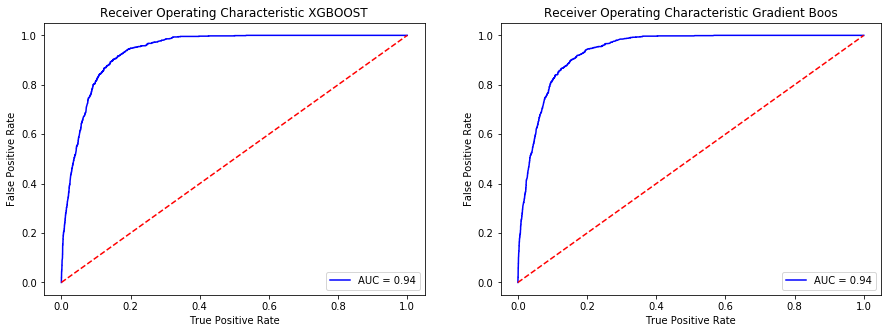

In [162]:
# XGBoost ROC/AUC, 
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0,1],[0,1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST')
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
ax.legend(loc = 'lower right')


probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0,1],[0,1],'r--')
ax1.set_title('Receiver Operating Characteristic Gradient Boost')
ax1.set_xlabel('True Positive Rate')
ax1.set_ylabel('False Positive Rate')
ax1.legend(loc = 'lower right')

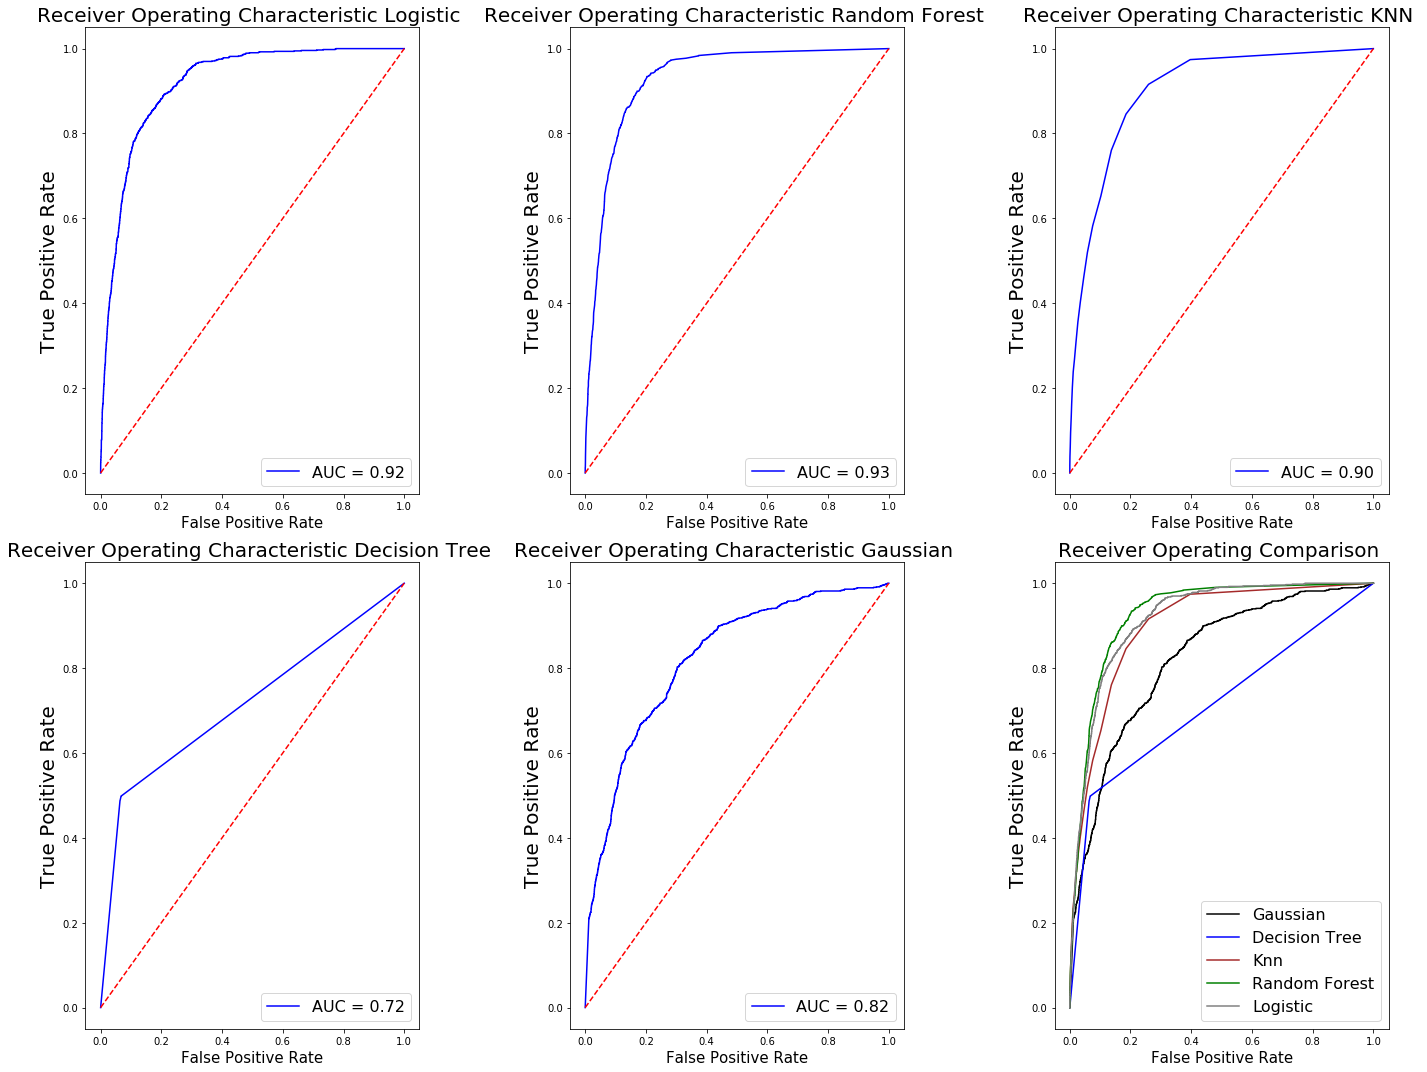

In [163]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

# ANALYZING THE RESULTS

So now we have to decide which one is the best model, and we have two types of wrong values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
In my opinion:

The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings
The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria Obs2 - i'll do the math manualy to be more visible and understanding

In [164]:
from sklearn.metrics import classification_report

In [165]:
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix:
 [[6964  109]
 [ 679  248]]


In [166]:
print('KNN reports\n', classification_report(y_test, knnpred))

KNN reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7073
           1       0.69      0.27      0.39       927

   micro avg       0.90      0.90      0.90      8000
   macro avg       0.80      0.63      0.67      8000
weighted avg       0.89      0.90      0.88      8000



# CHOOSED MODEL ANALYSIS

RECALL

Recall - Specificity
TN / (TN + FP)

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 7163+116 = 7279 clients that didin't subscribe(0), and our model predict 98% correct or 7163 correct and 116 incorrect

In [167]:
print(round(7163 /(7163 + 116),2))

0.98


Recall - Sensitivity
TP / (TP + FN)

For all POSITIVE(1) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 706 + 253 = 959 clients that subscribe(1), and our model predict 26% correct or 253 correct and 706 incorrect, BUT REMEMBER, its best we miss by False negative instead of False Positive

In [168]:
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.26
0.27


PRECISION

TN / (TN + FN) 

For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 7163 + 706 = 7869 clients that didin't subscribe(0), and our model predict 91% correct or 7163 correct and 706 incorrect

In [169]:
print(round(7163 / (7163 + 706),2))

0.91


Precision
TN / (TN + FN) 

For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 116 + 253 = 369 clients that subscribe(1), and our model predict 69% correct or 253 correct and 116 incorrect

In [170]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.69
0.69


F1-SCORE

F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics
F1 = 2(Precision(0) Recall(0)) / (Precision(0) + Recall(0))

In [171]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)

0.94

In [172]:
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)

0.38

AVG/ TOTAL
this consider the weights of sum of REAL VALUES

In [173]:
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)

0.88

In [174]:
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)

0.9

In [175]:
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

0.88